## Starbucks Drink Analysis
### Caroline Lowenstein
### DS 4003

### Data Background information

This data was collected to answer the following questions:
    - Can you train a Markov Chain to generate new Starbucks drink or food items?
    - Can you design an easy-to-interpret visualization for the nutrition of each item?
    - How to Starbucks menu items compare to McDonald’s menu items (see link to dataset below) in terms of nutrition?

I just looked at the Starbucks data, not the McDonald's data.

Starbucks is the owner of the data and the admin is a woman named Rachael Tatman

Tatmam works for Kaggle, and she collected the data to answer the above questions and give to kaggle users to manipulate. 

The data description can be found here: https://www.kaggle.com/datasets/starbucks/starbucks-menu


I chose this data because I wanted my project to be centered around food, and I am a frequent starbucks goer.  There was a lot of data, and I can picture different ways I can manipulate it and create visual representations of it. 


In [1]:
#import dependencies
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#load in data
df=pd.read_csv('/Users/carolinelowenstein/Desktop/everything/DS/potential data sets/starbucks data/starbucks_drinkMenu_expanded.csv')

General Information:

In [3]:
#analyze the first 5 rows
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
#looking at basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
#look for missing data
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

Drop Missing Data

In [6]:
#drop missing data
df.dropna(inplace=True)
print(df.isnull)

<bound method DataFrame.isnull of               Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Crea

In [7]:
#checking the miss value is gone
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

Analyzing the Beverage column

In [8]:
#finding the unique values in the beverage column 
df.Beverage.unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [9]:
#changing names to drop "Without Whipped Cream," because all of the drinks are without whipped cream; adding a note to metadata that all data is without whipped cream
df= df.set_index('Beverage')
df= df.rename(index={"Strawberries & Crème (Without Whipped Cream)": "Strawberries & Crème"})
df= df.rename(index={"Vanilla Bean (Without Whipped Cream)": "Vanilla Bean"})
df= df.rename(index={"Java Chip (Without Whipped Cream)": "Java Chip"})
df= df.rename(index={"Caramel (Without Whipped Cream)": "Caramel"})
df= df.rename(index={"Mocha (Without Whipped Cream)": "Mocha"})
df= df.rename(index={"Hot Chocolate (Without Whipped Cream)": "Hot Chocolate"})
df= df.rename(index={"Caramel Apple Spice (Without Whipped Cream)": "Caramel Apple Spice"})
df= df.rename(index={"White Chocolate Mocha (Without Whipped Cream)": "White Chocolate Mocha"})
df= df.rename(index={"Caffè Mocha (Without Whipped Cream)": "Caffè Mocha"})

#change Vanilla Latte and Skinny  Latte name to shorten it
df= df.rename(index={"Vanilla Latte (Or Other Flavoured Latte)": "Flavored Latte"})
df= df.rename(index={"Skinny Latte (Any Flavour)'": "Skinny Flavored Latte"})



In [10]:
df

,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage,,,,,,,,,,,,,,,,,
Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strawberries & Crème,Frappuccino® Blended Crème,Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
Vanilla Bean,Frappuccino® Blended Crème,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
Vanilla Bean,Frappuccino® Blended Crème,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0


Changing column names and dropping columns

In [11]:
#renaming Caffeine to make it easier to use later
df= df.rename(columns={"Caffeine (mg)": "Caffeine_mg"})
df.head()

,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine_mg
Beverage,,,,,,,,,,,,,,,,,
Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [12]:
#reset index 
df.reset_index(inplace = True)
df.head()
#(notes for me later: reset back by making axis =1)

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine_mg
0,Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [13]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
#Drop columns because I want my app to focus on calories, total fat, total carbs, sugar, and caffeine
df= df.drop(['Trans Fat (g) '], axis=1)
df= df.drop(['Saturated Fat (g)'], axis=1)
df= df.drop([' Sodium (mg)'], axis=1)
df= df.drop(['Cholesterol (mg)'], axis=1)
df= df.drop([' Dietary Fibre (g)'], axis=1)
df= df.drop(['Vitamin A (% DV) '], axis=1)
df= df.drop(['Vitamin C (% DV)'], axis=1)
df= df.drop(['Iron (% DV) '], axis=1)
df= df.drop([' Calcium (% DV) '], axis=1)
df= df.drop([' Total Carbohydrates (g) '], axis=1)



In [15]:
df

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine_mg
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75
...,...,...,...,...,...,...,...,...
236,Strawberries & Crème,Frappuccino® Blended Crème,Soymilk,320,3 2,64,5.0,0
237,Vanilla Bean,Frappuccino® Blended Crème,Tall Nonfat Milk,170,0.1,38,4.0,0
238,Vanilla Bean,Frappuccino® Blended Crème,Whole Milk,200,3.5,38,3.0,0
239,Vanilla Bean,Frappuccino® Blended Crème,Soymilk,180,1.5,35,3.0,0


In [16]:
#Rename columns so they are easier to use later and getting rid of random spaces
df = df.rename(columns={' Total Fat (g)': 'Total_Fat_g'})
df = df.rename(columns={' Total Carbohydrates (g) ': 'Total_Carb_g'})
df = df.rename(columns={' Sugars (g)': 'Sugars_g'})
df = df.rename(columns={' Protein (g) ': 'Protein_g'})




In [17]:
df.head()

,Beverage,Beverage_category,Beverage_prep,Calories,Total_Fat_g,Sugars_g,Protein_g,Caffeine_mg
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75


Yay! The columns have been dropped that I don't plan on using and the names have been changed so I can use them easily in the future

Analyze the non-numerical data

In [40]:
pd.unique(df.Beverage)

array(['Brewed Coffee', 'Caffè Latte', 'Caffè Mocha', 'Flavored Latte',
       'Caffè Americano', 'Cappuccino', 'Espresso',
       'Skinny Latte (Any Flavour)', 'Caramel Macchiato',
       'White Chocolate Mocha', 'Hot Chocolate', 'Caramel Apple Spice',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee', 'Mocha', 'Caramel',
       'Java Chip', 'Strawberries & Crème', 'Vanilla Bean'], dtype=object)

In [41]:
pd.unique(df.Beverage_category)

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [42]:
pd.unique(df.Beverage_prep)

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

Fixing the Caffeine variable below

In [18]:
#Making the "Varies" value in the Caffeine column a null value so I'm working with numerical data
df = df.replace({'Caffeine_mg': {'Varies': np.nan, 'varies': np.nan}})


In [19]:
#Dropping null values
df.dropna(inplace=True)
print(df.isnull)

<bound method DataFrame.isnull of                  Beverage           Beverage_category       Beverage_prep  \
0           Brewed Coffee                      Coffee               Short   
1           Brewed Coffee                      Coffee                Tall   
2           Brewed Coffee                      Coffee              Grande   
3           Brewed Coffee                      Coffee               Venti   
4             Caffè Latte     Classic Espresso Drinks   Short Nonfat Milk   
..                    ...                         ...                 ...   
236  Strawberries & Crème  Frappuccino® Blended Crème             Soymilk   
237          Vanilla Bean  Frappuccino® Blended Crème    Tall Nonfat Milk   
238          Vanilla Bean  Frappuccino® Blended Crème          Whole Milk   
239          Vanilla Bean  Frappuccino® Blended Crème             Soymilk   
240          Vanilla Bean  Frappuccino® Blended Crème  Grande Nonfat Milk   

     Calories Total_Fat_g  Sugars_g  Prot

In [20]:
df.head()

,Beverage,Beverage_category,Beverage_prep,Calories,Total_Fat_g,Sugars_g,Protein_g,Caffeine_mg
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75


In [21]:
#Making Caffeine_mg all integers so I can make a boxplot
df['Caffeine_mg'] = df['Caffeine_mg'].astype(int)

In [22]:
#Confirming they are all now integers
Caffeine_mg = df['Caffeine_mg'].dtype
Caffeine_mg


dtype('int64')

In [23]:
#confirming "Varies" has been dropped and all values are numeric 
pd.unique(df.Caffeine_mg)

array([175, 260, 330, 410,  75, 150,  85,  95, 180, 225, 300,  10,  20,
        25,  30,   0,  50,  70, 120,  55,  80, 110, 165, 235,  90, 125,
       170,  15, 130, 140, 100, 145,  65, 105])

Fixing the Total Fat variable below

In [24]:
#Checking if integers in other columns
Total_Fat_g = df['Total_Fat_g'].dtype
Total_Fat_g

dtype('O')

In [25]:
#Because total fat isn't an integer, I'm checking to see if there are any strings or objects
pd.unique(df.Total_Fat_g)

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [26]:
#One value is equal to 3 2, so I'm going to make it null
df = df.replace({'Total_Fat_g': {'3 2': np.nan}})
df.dropna(inplace=True)
print(df.isnull)

<bound method DataFrame.isnull of                  Beverage           Beverage_category       Beverage_prep  \
0           Brewed Coffee                      Coffee               Short   
1           Brewed Coffee                      Coffee                Tall   
2           Brewed Coffee                      Coffee              Grande   
3           Brewed Coffee                      Coffee               Venti   
4             Caffè Latte     Classic Espresso Drinks   Short Nonfat Milk   
..                    ...                         ...                 ...   
235  Strawberries & Crème  Frappuccino® Blended Crème          Whole Milk   
237          Vanilla Bean  Frappuccino® Blended Crème    Tall Nonfat Milk   
238          Vanilla Bean  Frappuccino® Blended Crème          Whole Milk   
239          Vanilla Bean  Frappuccino® Blended Crème             Soymilk   
240          Vanilla Bean  Frappuccino® Blended Crème  Grande Nonfat Milk   

     Calories Total_Fat_g  Sugars_g  Prot

In [27]:
df['Total_Fat_g'] = df['Total_Fat_g'].astype(float)

Checking that the rest of the variables are numeric and looking at unique values

In [33]:
pd.unique(df.Calories)

array([  3,   4,   5,  70, 100, 150, 110, 130, 190, 170, 240, 200, 180,
       220, 260, 230, 280, 340, 290, 160, 250, 210, 320, 270,  10,  15,
        25,  50,  80,  60,  90, 120, 140, 300, 310, 350, 400, 370, 450,
       510, 460, 380, 330, 360, 390, 420, 430])

In [34]:
Calories = df['Calories'].dtype
Calories

dtype('int64')

In [37]:
pd.unique(df.Sugars_g)

array([ 0,  9,  4, 14,  6, 18, 17,  8, 23, 22, 11, 13, 27, 26, 20, 34, 44,
       43, 33, 35, 45,  7,  3, 10,  5, 16, 21, 15, 24, 32, 41, 40, 31, 29,
       25, 39, 58, 51, 74, 64, 55, 54, 49, 65, 83, 28, 42, 37, 53, 46, 56,
       71, 19, 30, 38, 36, 50, 47, 69, 66, 76, 73, 59, 77, 62, 60, 84, 80,
       52, 68])

In [38]:
Sugars_g = df['Sugars_g'].dtype
Sugars_g

dtype('int64')

In [35]:
pd.unique(df.Protein_g)

array([ 0.3,  0.5,  1. ,  6. ,  5. , 10. ,  8. , 13. , 12. , 16. ,  7. ,
        9. , 11. , 17. , 14. , 15. ,  0.4,  3. ,  4. , 19. , 18. ,  0. ,
        0.2,  2. , 20. ])

In [36]:
Protein_g = df['Protein_g'].dtype
Protein_g

dtype('float64')

The data is all numeric now, so box plots can be made

### Box Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb823ab3eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb823bba430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb823ab3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb823bba970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb823bbac10>],
 'means': []}

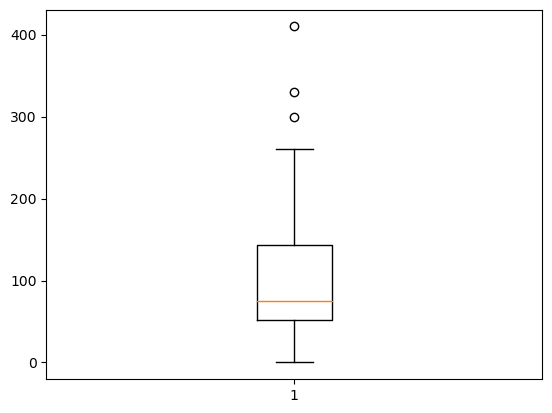

In [28]:
#Create a boxplot of Caffiene, specifically to observe outliers
plt.boxplot(df.Caffeine_mg, )

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb823e67ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb823e78460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb823e67c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb823e789a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb823e78c40>],
 'means': []}

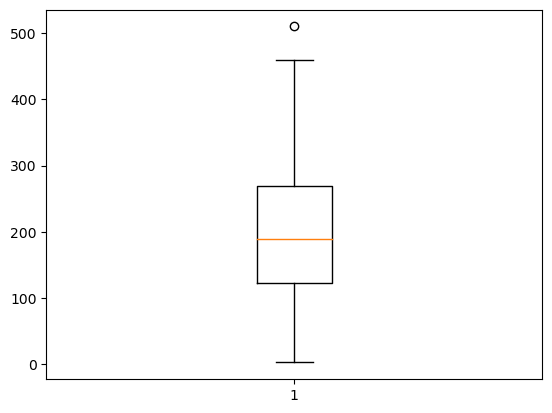

In [29]:
#Using plots to visualize 
plt.boxplot(df.Calories)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb823edf880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb823edfdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb823edf5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb823feb340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb823feb5e0>],
 'means': []}

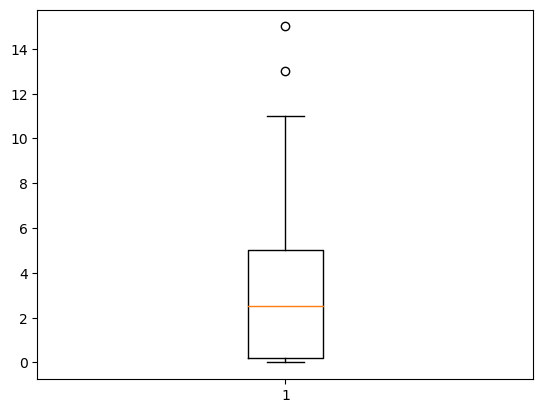

In [30]:
#Using plots to visualize 
plt.boxplot(df.Total_Fat_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb82521bf70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8252234f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb82504fb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8252239d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb825223c70>],
 'means': []}

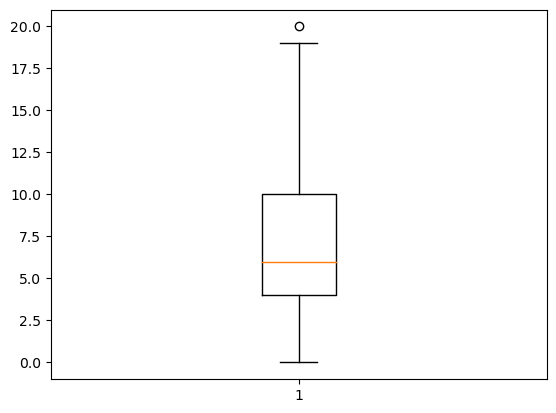

In [32]:
#Using plots to visualize 
plt.boxplot(df.Protein_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9de14a9190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9de14a95b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9de1497eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9de14a9af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9de14a9d90>],
 'means': []}

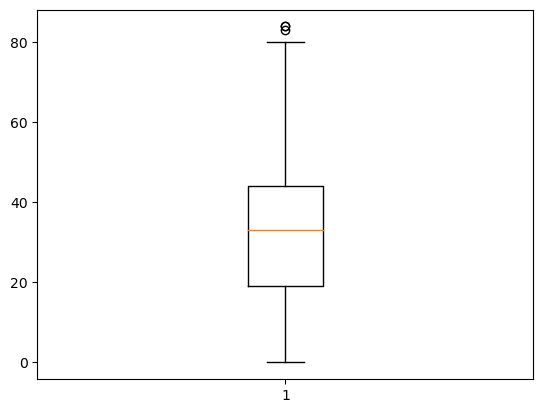

In [ ]:
#Using plots to visualize 
plt.boxplot(df.Sugars_g)

Box Plot Conclusions:

After looking at the boxplots, I feel comfortable with the outliers because there can be specific drinks with really high calories, fat, protein, or caffeine.

The boxplots help me visualize the numbers I am working with and the range of values in each category.

Also, making the box plots ensured that the variables are floats or integers, which is good so I can use them in the future with numerical features.

### Histograms

(array([12., 26., 39., 45., 31., 29., 21.,  8.,  4.,  3.]),
 array([  3. ,  53.7, 104.4, 155.1, 205.8, 256.5, 307.2, 357.9, 408.6,
        459.3, 510. ]),
 <BarContainer object of 10 artists>)

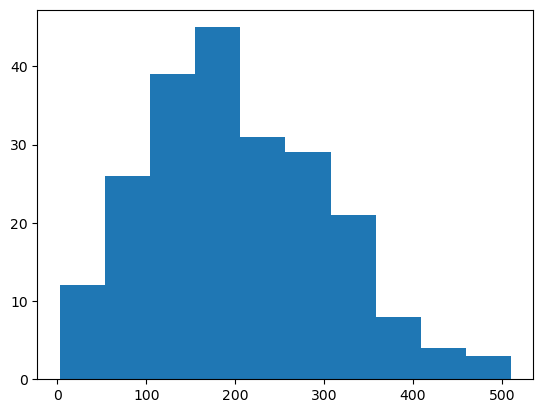

In [44]:
plt.hist(df.Calories)

(array([80., 35., 37., 23., 23.,  6.,  9.,  3.,  1.,  1.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

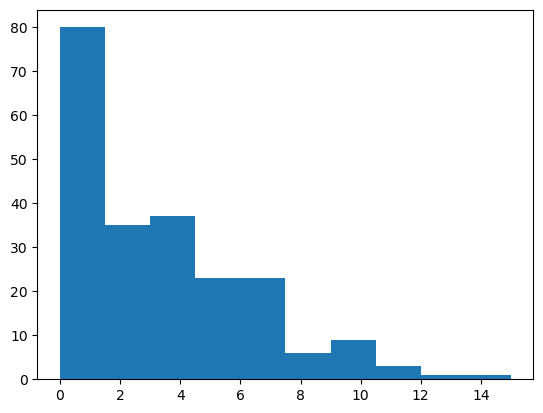

In [46]:
plt.hist(df.Total_Fat_g)

(array([22., 21., 39., 32., 39., 21., 18.,  8., 10.,  8.]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <BarContainer object of 10 artists>)

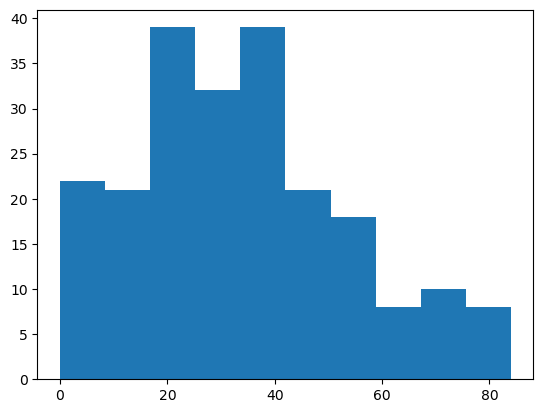

In [47]:
plt.hist(df.Sugars_g)

(array([18., 35., 40., 41., 19., 20., 14., 13., 12.,  6.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

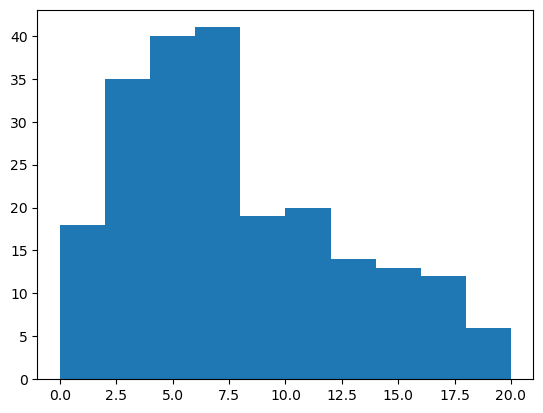

In [48]:
plt.hist(df.Protein_g)

(array([52., 61., 37., 50., 12.,  2.,  1.,  1.,  1.,  1.]),
 array([  0.,  41.,  82., 123., 164., 205., 246., 287., 328., 369., 410.]),
 <BarContainer object of 10 artists>)

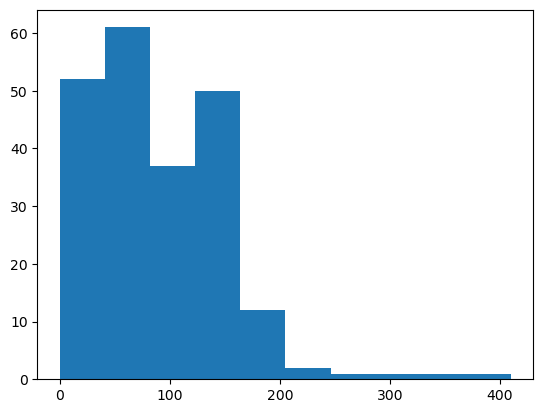

In [49]:
plt.hist(df.Caffeine_mg)

Histograms conclusion

These graphs helped me understand the distributions of calories, fat, sugar, protein, and caffeine

Calories and sugar look generally normally distributed.
Fat, protein, and caffeine are more right skewed.

### Data Dictionary

| Variable Name    | Definition |
| -------- | ------- |
| Beverage  | The name of the drink in question    |
| Beverage_category | The type of beverage in question     |
| Beverage_prep    |  How the beverage in question is being prepared, size and milk    |
| Calories  | The amount of calories in specific beverage    |
| Total_Fat_g | Total fat in grams in a specific beverage     |
| Sugars_g    | Total sugar in grams in a specfic beverage   |
| Protein_g | Total protein in grams in a specific beverage     |
| Caffeine_mg    | Total caffeine in milligrams in a specific beverage    |


### Potential UI Components

I want to try to include pictures of the drinks in the dataset.  
- Layout: I aso invision text and drink selections on the left side of screen, and then visual aspects that change on the right side of the screen.  The right side of the screen changes based on what the user selects on the left side.  
- Icons and buttons: there will be buttons to manipulate what is displayed on the right side of the screen.  Whether it's an image of a drink, or a graph comparing calories, etc
- Navigational components: there will be a nav bar at the top to allow easy navigation
- Colors: I will definitely include the iconic starbucks green and I think white will balance the green out well too.

### Potential Data Visualization

- a colored line graph showing drinks that the user selects and comparing their nutritional value
- a table listing all the nutrional information in a concise and legible view of a selected drink
- a scatter plot of two nutrional information facts the the user can choose and filter which drinks they want to see
- a bar graph for a drink with the bars being the different nutrional information in question